# Лабораторная работа №6

**Задание:** _загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных_

**Импортируем необходимые библиотеки**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Импортируем набор данных**

In [27]:
prod_frame = pd.read_csv('products.csv')
prod_frame

,product_id,product_name,category,price,quantity
0,1,Яблоки,Фрукты,50.0,100
1,2,Молоко,Молочные продукты,70.0,50
2,3,Хлеб,Хлебобулочные изделия,30.0,200
3,4,Сыр,Молочные продукты,150.0,20
4,5,Морковь,Овощи,40.0,150
5,6,Картофель,Овощи,35.0,100
6,7,Колбаса,Мясные продукты,120.0,30
7,8,Курица,Мясные продукты,90.0,40
8,9,Рыба,Морепродукты,200.0,10
9,10,Мандарины,Фрукты,60.0,80


**Описание полей:**

* product_id - уникальный идентификатор продукта (целочисленный)
* product_name - название продукта (категориальный)
* category - категория продукта (категориальный)
* price - цена продукта (вещественный)
* quantity - количество продукта, проданного за период (целочисленный)

**Задание:** _Matplotlib_

**Построить любой график (любого рода) с помощью чистого matplotlib / pylab**

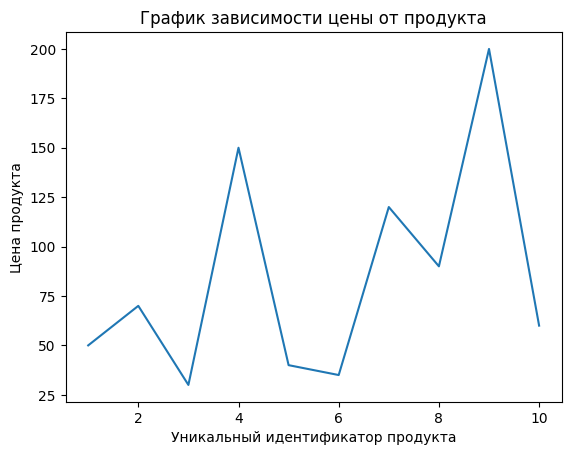

In [28]:
x = np.array(prod_frame['product_id'])
y = np.array(prod_frame['price'])

plt.plot(x, y)
plt.title('График зависимости цены от продукта')
plt.xlabel('Уникальный идентификатор продукта')
plt.ylabel('Цена продукта')

plt.show()

**Построить несколько суб-графиков на одном графике используя .subplot**

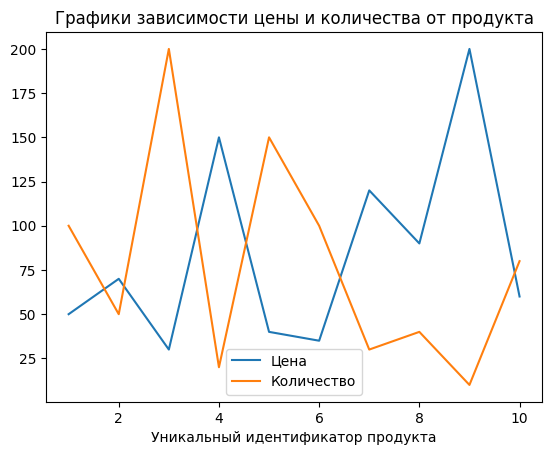

In [29]:

x = np.array(prod_frame['product_id'])

y_price = np.array(prod_frame['price'])
y_quan = np.array(prod_frame['quantity'])

fig, ax = plt.subplots()

ax.plot(x, y_price, label='Цена')
ax.plot(x, y_quan, label='Количество')

ax.legend()

ax.set_title('Графики зависимости цены и количества от продукта')
ax.set_xlabel('Уникальный идентификатор продукта')

plt.show()

**Задание:** _на основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать._

<Axes: title={'center': 'Продажи по категориям продуктов'}, xlabel='category'>

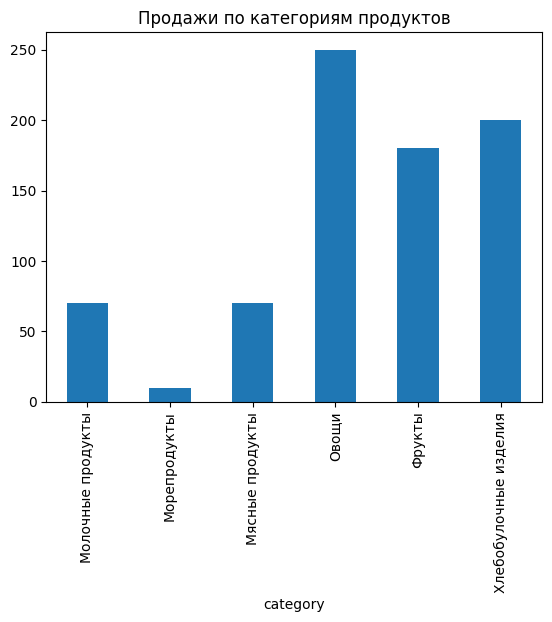

In [30]:
# График продаж по категориям продуктов (метод DataFrame)
prod_frame.groupby('category')['quantity'].sum().plot(kind='bar', title='Продажи по категориям продуктов')

# График продаж по категориям продуктов (метод Series)
prod_frame.groupby('category')['quantity'].sum().plot.bar(title='Продажи по категориям продуктов')

<Axes: title={'center': 'Цены на продукты'}, xlabel='product_name'>

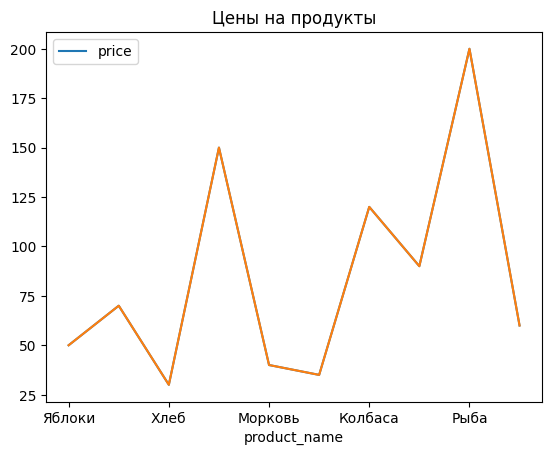

In [31]:
# График цен на продукты (метод DataFrame)
prod_frame.plot(x='product_name', y='price', kind='line', title='Цены на продукты')

# График цен на продукты (метод Series)
prod_frame['price'].plot.line(x='product_name', title='Цены на продукты')

<Axes: title={'center': 'quantity'}, xlabel='category'>

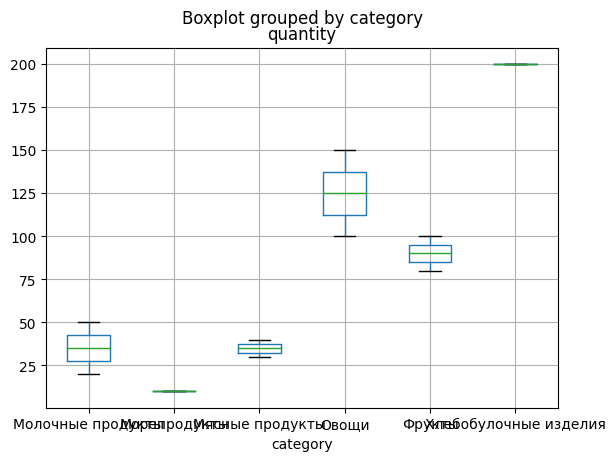

In [52]:
prod_frame.boxplot(column='quantity', by='category')


<Axes: >

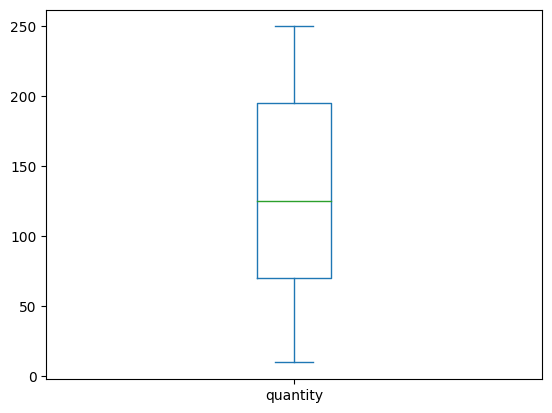

In [33]:
prod_frame.groupby('category')['quantity'].sum().plot.box()

**Задание:** _Seaborn_

**Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных**

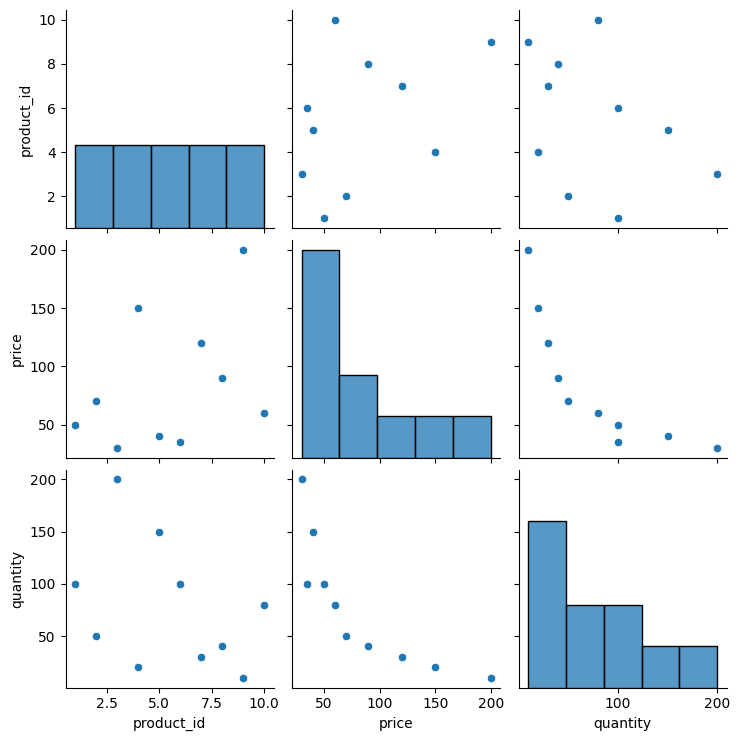

In [47]:
sns.pairplot(prod_frame)

**Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных**

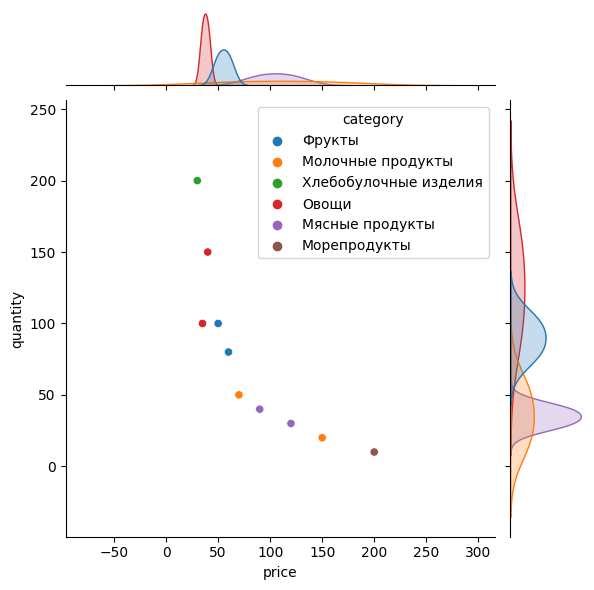

In [44]:
sns.jointplot(x='price', y='quantity', data=prod_frame, hue='category')

**Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального**

<Axes: xlabel='quantity', ylabel='category'>

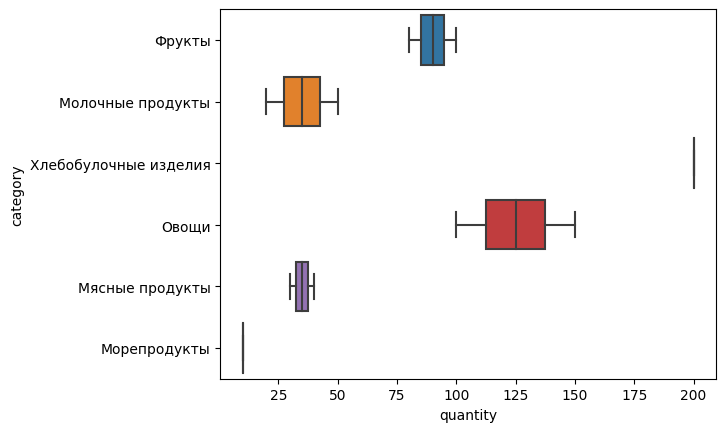

In [48]:
sns.boxplot(y='category', x='quantity', data=prod_frame)

**Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)**

<Axes: >

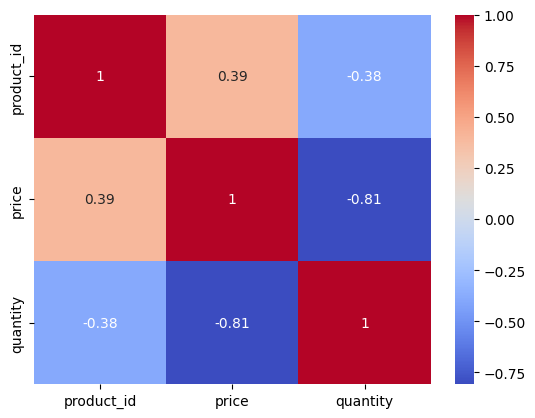

In [37]:
prod_frame = prod_frame.select_dtypes(include=['float64', 'int64'])
sns.heatmap(prod_frame.corr(), annot=True, cmap='coolwarm')

**Задание:** _построить любой график (связанный с вашими данными) с помощью plotly_

In [38]:
prod_frame = pd.read_csv('products.csv')
prod_sales = prod_frame.groupby('category')['quantity'].sum().reset_index()

fig = px.bar(prod_sales, x='category', y='quantity', color='category', title='Продажи по категориям продуктов')
fig.show()